# Finding Lane Lines

## Import all the necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Helper Functions

In [2]:
def grayscale(img):
    """Convert an image into Grayscale."""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gaussian_blur(img, kernel_size):
    """Applies a Gussian Noise kernel."""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform."""
    return cv2.Canny(img, low_threshold, high_threshold)

def region_of_interest(img, vertices):
    """Applies an image mask."""
    
    # define a blank mask
    mask = np.zeros_like(img)
    
    # define a 3 channel or 1 channel color to fill the mask with depending on th input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    # filling pixels inside the polygon defined by "vertices" with the fill color  
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    # returning the image only where mask pixels are nonzero
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    """Draw hough lines."""
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness, cv2.LINE_AA)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """ hough transform
    
    `img` should be the output of a Canny transform.

    Returns an image with hough lines draw.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
    # Create an empty black image
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    
    return line_img

def weighted_img(origin_img, hough_img, a=0.8, b=1., r=0.):
    """
    `hough_img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `origin_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    origin_img * α + hough_img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(origin_img, a, hough_img, b, r)

## Read and show an image

This image is: <class 'numpy.ndarray'>, with dimensions: (540, 956, 3)


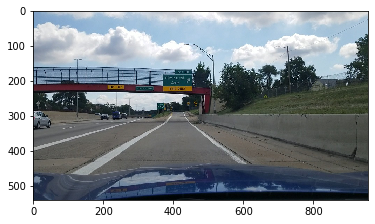

In [3]:
img = mpimg.imread("img/lane_3.jpg")
print("This image is: {}, with dimensions: {}".format(type(img), img.shape))

plt.imshow(img)

## Setting all the necessary parameters

In [4]:
# gaussian blur
kernel_size = 7

# canny
low_threshold = 10
high_threshold = 200

# ROI
ROI = [[(20,460),(340, 300), (460, 300), (740,460)]]

# hough 
rho = 1       
theta = np.pi/180  
threshold = 40     
min_line_len = 100  
max_line_gap = 50

# add weighted
a = 0.8
b = 1
r = 0


## Start to detect lane lines

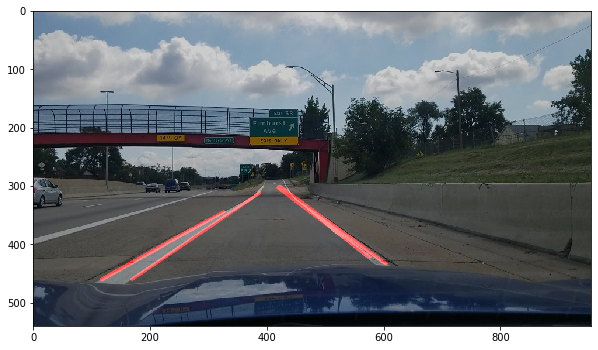

In [5]:
def main():
    # convert an image into grayscale
    gray = grayscale(img)
    
    # reduce noise - gaussian blur
    blur = gaussian_blur(gray, kernel_size)
    
    # edge detection - canny
    edges = canny(blur, low_threshold, high_threshold)
    
    # ROI mask
    vertices = np.array(ROI, dtype=np.int32)
    masked_img = region_of_interest(edges, vertices)
    
    # hough transform
    hough_img = hough_lines(masked_img, rho, theta, threshold, min_line_len, max_line_gap)
    
    # image fusion
    result_img = weighted_img(img, hough_img, a, b, r)
    
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(result_img)

main()